# Низамутдинов Тимур
## Рабочая тетрадь 4

### 1.1 Задание

In [1]:
import numpy as np
x = np.array(list(range(4)))
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

0.9999999999999997 -0.949999999999999


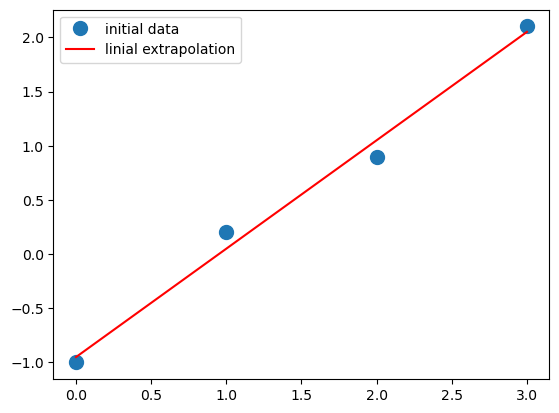

In [3]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='initial data', markersize=10)
plt.plot(x, m*x + c, 'r', label='linial extrapolation')
plt.legend()
plt.show()

In [4]:
from numpy import *
from numpy.random import *

In [5]:
delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta * (rand(11)-0.5)
x += delta * (rand(11)-0.5)

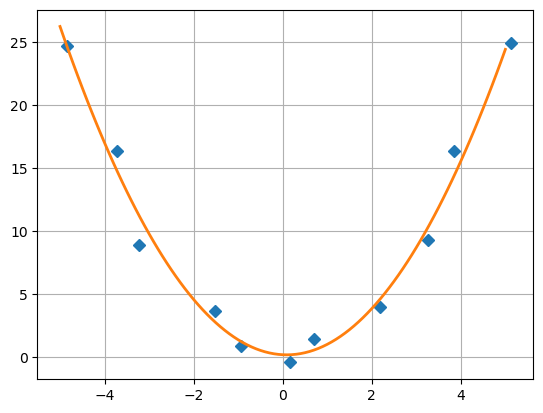

In [6]:
m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(
    x_prec, 
    s[0] * x_prec**2 + 
    s[1] * x_prec + 
    s[2],
    '-',
    lw=2
    )
    
plt.grid()
plt.show()

In [7]:
delta = 1.0
x = linspace(-5, 5, 11)
y = x**3 + delta * (rand(11)-0.5)
x += delta * (rand(11)-0.5)

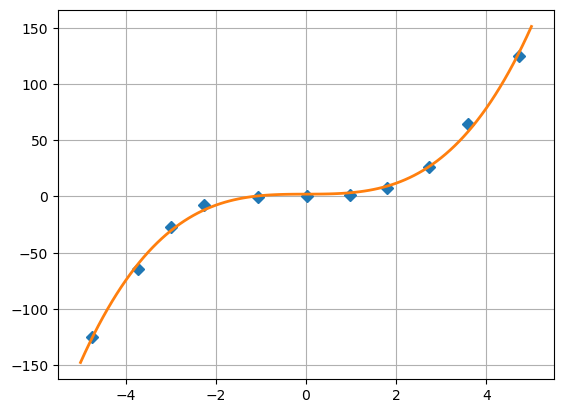

In [8]:
m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(
    x_prec, 
    s[0] * x_prec**3 + 
    s[1] * x_prec**2 + 
    s[2] * x_prec + 
    s[3],
    '-',
    lw=2
    )
    
plt.grid()
plt.show()

### 1.2 Задание

In [9]:
def linear(x: float, b0: float, b1: float) -> float:
    return b0 + b1 * x
    
def square(x: float, b0: float, b1: float, b2: float) -> float:
    return b0 + b1 * x + b1 * x**2

def logariphmic(x: float, b0: float, b1: float) -> float:
    return b0 + b1*log(x)

def exponential(x: float, b0: float, b1: float) -> float:
    return b0 * x**b1
    
x, b0, b1, b2 = 2, 3, 5, 6

linear(x, b0, b1), square(x, b0, b1, b2), logariphmic(x, b0, b1), exponential(x, b0, b1)

(13, 33, 6.465735902799727, 96)

In [10]:
beta = (0.25, 0.75)

xdata = np.linspace(0, 5, 50)
y = linear(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))

In [11]:
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(linear, xdata, ydata)
beta_opt

array([0.24275347, 0.7525928 ])

In [12]:
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - linear(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.0001385826756762836
0.12185717874726668


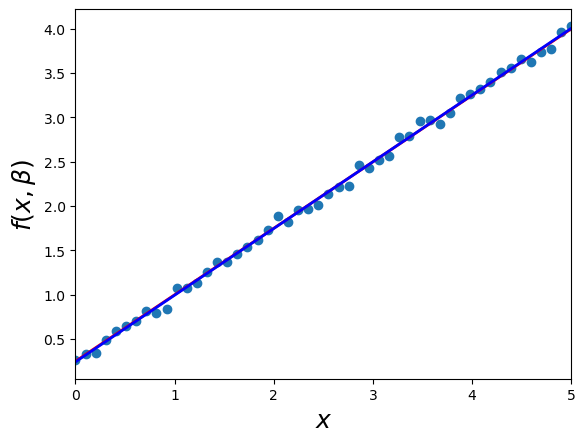

In [13]:
def plot(xdata, ydata, beta_opt, func):
    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2)
    ax.plot(xdata, func(xdata, *beta_opt), 'b', lw=2)
    ax.set_xlim(0, 5)
    ax.set_xlabel(r'$x$', fontsize=18)
    ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
    plt.show()

plot(xdata, ydata, beta_opt, linear)

In [14]:
beta = (0.25, 0.75, 0.5)

xdata = np.linspace(0, 5, 50)

y = square(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(square, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - square(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.25928352 0.74947521 1.        ]
inf
0.11832989373192732


C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


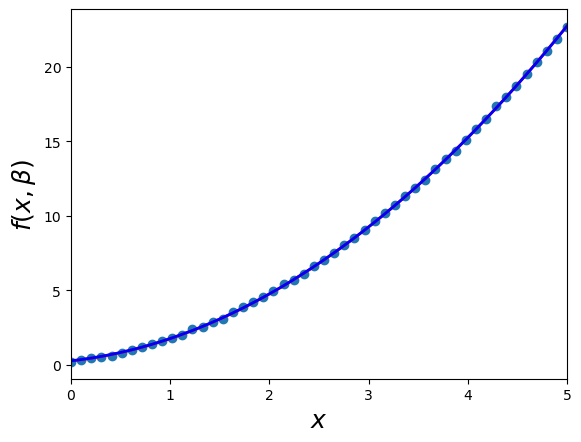

In [15]:
plot(xdata, ydata, beta_opt, square)

In [16]:
beta = (1, 2)

xdata = np.linspace(1, 5, 50)

y = logariphmic(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(logariphmic, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - logariphmic(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.99507413 1.9947868 ]
5.289703350763611e-05
0.12232128921377357


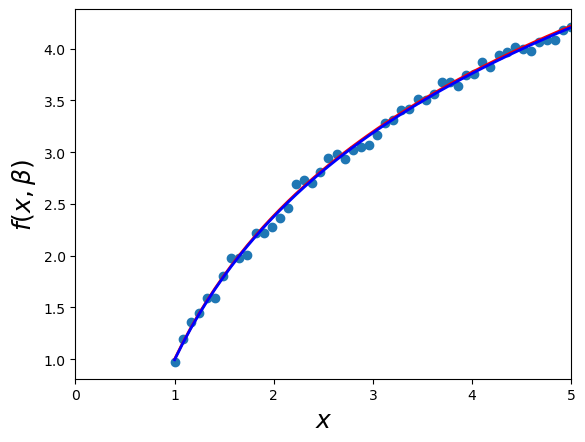

In [17]:
plot(xdata, ydata, beta_opt, logariphmic)

In [18]:
beta = (1, 2)

xdata = np.linspace(1, 5, 50)

y = exponential(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(exponential, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - exponential(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.00464324 1.99615144]
5.5290971037812645e-06
0.12925407444490708


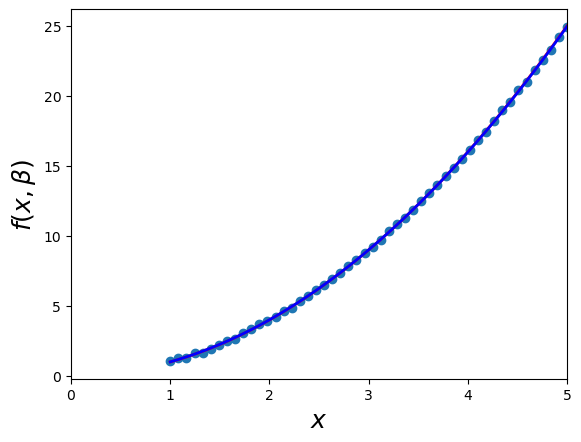

In [19]:
plot(xdata, ydata, beta_opt, exponential)

### 2.1 Задание

In [20]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('Salary_Data.csv', sep=','))
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Salary_Data.csv'

In [ ]:
plt.scatter(df['YearsExperience'], df['Salary'], color='b', label='salary data')
plt.xlabel('years of expirience')
plt.ylabel('salary')
plt.show()
print(df.shape)
df.describe()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

In [ ]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### 3.1 Задание

In [ ]:
df = pd.DataFrame(pd.read_csv('winequality-red.csv', sep=','))
df.head()

In [ ]:
print(df.shape)
df.describe()

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.head(), y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
y_pred = regressor.predict(X_test)
print('MSE:', sklearn.metrics.mean_squared_error(y_test, y_pred))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

### 3.2 Задание

Вариант 1

In [ ]:
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])
x, y

In [ ]:
A = np.vstack([x, np.ones(len(x))]).T
A

In [ ]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='initial data', markersize=10)
plt.plot(x, m*x + c, 'r', label='linial extrapolation')
plt.legend()
plt.show()

In [ ]:
m = vstack((x**2, x, ones(6))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(
    x_prec, 
    s[0] * x_prec**2 + 
    s[1] * x_prec + 
    s[2],
    '-',
    lw=2
    )
    
plt.grid()
plt.show()